just a stub and a gallery of templates ATM. will extend as it gets used

In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
cities500 = pd.read_json("cities500.json")

In [15]:
c100k=cities500.loc[cities500["population"] > 100000]
c100k_geo = gpd.GeoDataFrame(
    c100k, geometry=gpd.points_from_xy(c100k.longitude, c100k.latitude))

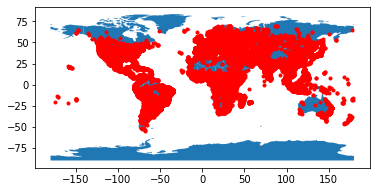

In [16]:
fig, ax = plt.subplots()
world.plot(ax=ax)
c10k_geo.plot(ax=ax, color='r', marker='.')

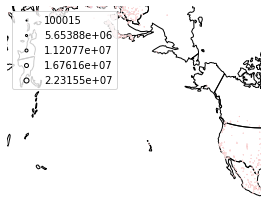

In [22]:
fig = plt.figure(figsize=(10,5))
proj = projection= gcrs.LambertConformal()
ax1 = plt.subplot(121, projection=proj)
ax1 = gplt.pointplot(
    c100k_geo, projection=proj,
    hue='population', cmap='Set1',
    edgecolor='white', linewidth=0.5,
    scale='population', #limits=(8, 24),
    legend=True, legend_var='scale',
    legend_kwargs={'loc': 'upper left', 'markeredgecolor': 'black'},
    #legend_values=[2, 1], legend_labels=['2 Fatalities', '1 Fatality'],
    ax=ax1
)
gplt.polyplot(world, ax=ax1)